In [1]:
#importing libraries for web scrapping
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the Url
Url = urlopen('https://www.flipkart.com/search?q=ps%205%20games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off')
WebData = Url.read()

In [3]:
soup1 = bs(WebData)

In [4]:
pages_link = soup1.find_all('a',class_='ge-49M')
page_link = 'https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='

for i in range(2,7):
    Url = page_link+str(i)
    page_data = urlopen(Url)
    WebData1 = page_data.read()
    WebData+=WebData1

In [5]:
soupdata = bs(WebData,'html.parser')

In [6]:
#checking directory of soupdata
#dir(soupdata)

In [7]:
Containers = soupdata.find_all('div',class_='_4ddWXP')
print(type(Containers),len(Containers))

<class 'bs4.element.ResultSet'> 200


In [8]:
#finding data of first container
#Containers[0]

In [9]:
#print(Containers[0].prettify())

In [10]:
f = open('C:\\Users\\Faisal\\OneDrive\\Desktop\\Amazon\\PS_5_Games.csv','wb')
f.write('Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl\n'.encode())

for items in Containers:
    #finding all product name
    product = items.find('a',class_='s1Q9rs')
    Product_Name = product.text.strip().replace(',','')
    
    #finding stars of all product
    Stars = items.find('div',class_='_3LWZlK')
    try:
        Stars = Stars.text
    except:
        Stars = 0
    
    
    #finding price of all product
    Current_Price = items.find('div',class_='_30jeq3').text.replace(',','').replace('₹','')
   
    
    #finding discount on all product
    Discount = items.find('div',class_='_3Ay6Sb')
    try:
        Discount = Discount.text
    except:
        Discount = '0% off'
   

    
    #finding MRP of all product
    MRP = items.find('div',class_='_3I9_wc')
    try:
        MRP = MRP.text.replace(',','').replace('₹','')
    except:
        MRP = 0
    
    
    
    #finding ratings on all product
    Ratings = items.find('span',class_='_2_R_DZ')
    try:
        Ratings = Ratings.text.strip('( )')
    except:
        Ratings = 0
    
    
    
    #finding delivery options of all product
    Delivery = items.find('div',class_='_2Tpdn3').text.strip()

    
   
    #finding all images
    Image = items.img
    ImageUrl = Image.get('src')
    
    
 
      
    f.write(f'{Product_Name},{Stars},{Current_Price},{Discount},{MRP},{Ratings},{Delivery},{ImageUrl}\n'.encode())
    print(Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl)
  
    print('\n')
f.close()

Horizon Forbidden West 4.5 2899 42% off 4999 156 Free delivery https://rukminim1.flixcart.com/image/612/612/ku1k4280/physical-game/d/f/d/no-standard-edition-horizon-forbidden-west-full-game-ps5-original-imag799yyzwxj2b5.jpeg?q=70


PS5 - Uncharted : Legacy Of Thieves collection 4.7 1599 46% off 2999 66 Free delivery https://rukminim1.flixcart.com/image/612/612/kwwfte80/physical-game/e/f/u/no-standard-edition-ps5-uncharted-legacy-of-thieves-collection-original-imag9h7sgfnyqqrx.jpeg?q=70


Marvel’s Spider-Man: Miles Morales (Ultimate Edition) 4.7 4495 10% off 4999 215 Free delivery https://rukminim1.flixcart.com/image/612/612/kj7gwi80/physical-game/z/x/m/ultimate-edition-marvel-s-spider-man-miles-morales-full-game-ps5-original-imafytxkkvhbeqgw.jpeg?q=70


Gran Turismo 7 (Standard) 4.5 2918 41% off 4999 98 Free delivery https://rukminim1.flixcart.com/image/612/612/kwb07m80/physical-game/t/e/p/yes-standard-edition-ps5-gran-turismo-7-standard-ed-full-game-original-imag9yd5uzdbqp5c.jpeg?q=70

In [11]:
#opening file in dataframe
df=pd.read_csv('C:\\Users\\Faisal\\OneDrive\\Desktop\\Amazon\\PS_5_Games.csv',error_bad_lines=False)

b'Skipping line 118: expected 8 fields, saw 9\nSkipping line 119: expected 8 fields, saw 9\n'


In [12]:
df

,Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl
0,Horizon Forbidden West,4.5,2899,42% off,4999,156,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
1,PS5 - Uncharted : Legacy Of Thieves collection,4.7,1599,46% off,2999,66,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
2,Marvel’s Spider-Man: Miles Morales (Ultimate E...,4.7,4495,10% off,4999,215,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
3,Gran Turismo 7 (Standard),4.5,2918,41% off,4999,98,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
4,Call Of Duty : Modern Warfare II,0.0,5955,14% off,6999,0,Free delivery,https://rukminim1.flixcart.com/image/612/612/x...
...,...,...,...,...,...,...,...,...
193,PlayStation Store Gift Card: 3500 INR (PSN Dig...,0.0,3500,0% off,0,0,Bank Offer,https://rukminim1.flixcart.com/image/612/612/l...
194,PlayStation Store Gift Card: 4000 INR (PSN Dig...,5.0,4000,0% off,0,4,Bank Offer,https://rukminim1.flixcart.com/image/612/612/l...
195,PlayStation Store Gift Card: 2500 INR (PSN Dig...,5.0,2500,0% off,0,4,Bank Offer,https://rukminim1.flixcart.com/image/612/612/l...
196,PlayStation Store Gift Card: 4500 INR (PSN Dig...,0.0,4500,0% off,0,0,Bank Offer,https://rukminim1.flixcart.com/image/612/612/l...


In [13]:
df.head()

,Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl
0,Horizon Forbidden West,4.5,2899,42% off,4999,156,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
1,PS5 - Uncharted : Legacy Of Thieves collection,4.7,1599,46% off,2999,66,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
2,Marvel’s Spider-Man: Miles Morales (Ultimate E...,4.7,4495,10% off,4999,215,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
3,Gran Turismo 7 (Standard),4.5,2918,41% off,4999,98,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
4,Call Of Duty : Modern Warfare II,0.0,5955,14% off,6999,0,Free delivery,https://rukminim1.flixcart.com/image/612/612/x...


In [14]:
#finding count of columns and rows
df.shape

(198, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   198 non-null    object 
 1   Stars          198 non-null    float64
 2   Current_Price  198 non-null    int64  
 3   Discount       198 non-null    object 
 4   MRP            198 non-null    int64  
 5   Ratings        198 non-null    int64  
 6   Delivery       198 non-null    object 
 7   ImageUrl       198 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 12.5+ KB


In [16]:
#finding the product having highest ratings
df[df['Ratings']==max(df['Ratings'])]

,Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl
129,Far Cry 5,4.4,999,50% off,1999,949,Free delivery,https://rukminim1.flixcart.com/image/612/612/j...


In [17]:
#finding the top 5 product having highest ratings
top5rated = df.sort_values(by = 'Ratings',ascending = False).head(5)
top5rated

,Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl
129,Far Cry 5,4.4,999,50% off,1999,949,Free delivery,https://rukminim1.flixcart.com/image/612/612/j...
162,The Elder Scrolls V: Skyrim,4.6,819,48% off,1599,405,Free delivery,https://rukminim1.flixcart.com/image/612/612/a...
154,Far Cry 5 (Deluxe Edition),4.5,1529,59% off,3799,363,Free delivery,https://rukminim1.flixcart.com/image/612/612/j...
149,Metal Gear Solid V: The Definitive Experience,4.6,1309,22% off,1699,343,Free delivery,https://rukminim1.flixcart.com/image/612/612/p...
141,Street Fighter V,4.1,1349,46% off,2499,240,Free delivery,https://rukminim1.flixcart.com/image/612/612/j...


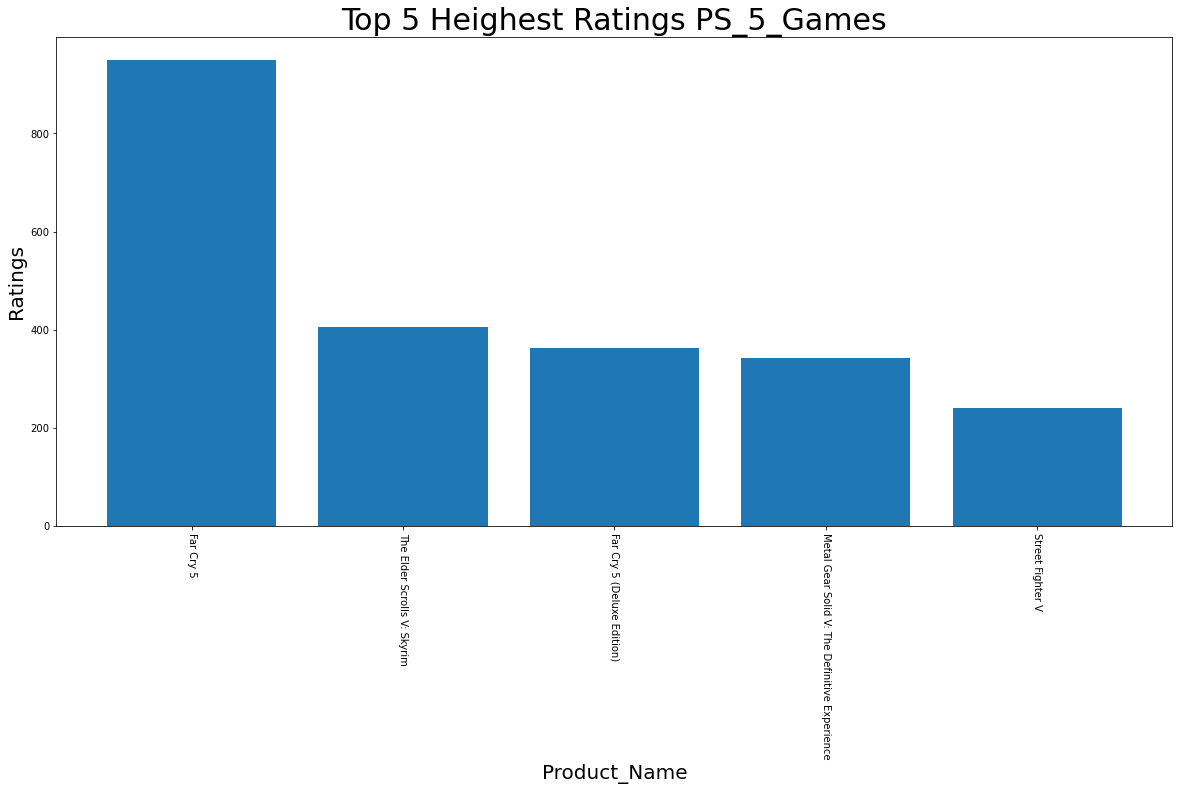

In [18]:
plt.figure(figsize=(20,9))
plt.bar(x=top5rated['Product_Name'],height=top5rated['Ratings'])
plt.title('Top 5 Heighest Ratings PS_5_Games',fontsize=30)
plt.xlabel('Product_Name',fontsize=20)
plt.ylabel('Ratings',fontsize=20)
plt.xticks(rotation = 270)
plt.show()

In [19]:
#finding most affordable PS_5_Games
top5currentPrice = df.sort_values(by='Current_Price').head(10)
top5currentPrice

,Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl
119,Grand Theft Auto V: Criminal Enterprise Starte...,3.1,199,75% off,799,9,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
115,MJT5 Fun Brick Game Set for Kids Freedom Editi...,3.5,335,44% off,599,152,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
130,Techglow Tekken 5 FULL GAME PLAYSTATION 2 in d...,2.3,540,55% off,1200,3,Bank Offer,https://rukminim1.flixcart.com/image/612/612/k...
180,Metal Gear Solid V : Ground Zeroes,3.6,720,53% off,1555,169,Free delivery,https://rukminim1.flixcart.com/image/612/612/a...
137,Clubics Plug and Play TV Video Game AK-2521D V...,2.5,729,75% off,2999,4,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
185,INSPIRE LIGHTER HOUSE bit (2 Player) TV Video ...,2.6,739,75% off,2999,15,Bank Offer,https://rukminim1.flixcart.com/image/612/612/k...
41,PS5 - Destruction All Stars,4.0,765,48% off,1499,4,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
177,Metal Gear Solid V : The Phantom Pain,4.6,809,46% off,1499,193,Bank Offer,https://rukminim1.flixcart.com/image/612/612/p...
162,The Elder Scrolls V: Skyrim,4.6,819,48% off,1599,405,Free delivery,https://rukminim1.flixcart.com/image/612/612/a...
150,Gran Turismo 5,4.0,822,17% off,999,209,Free delivery,https://rukminim1.flixcart.com/image/612/612/a...


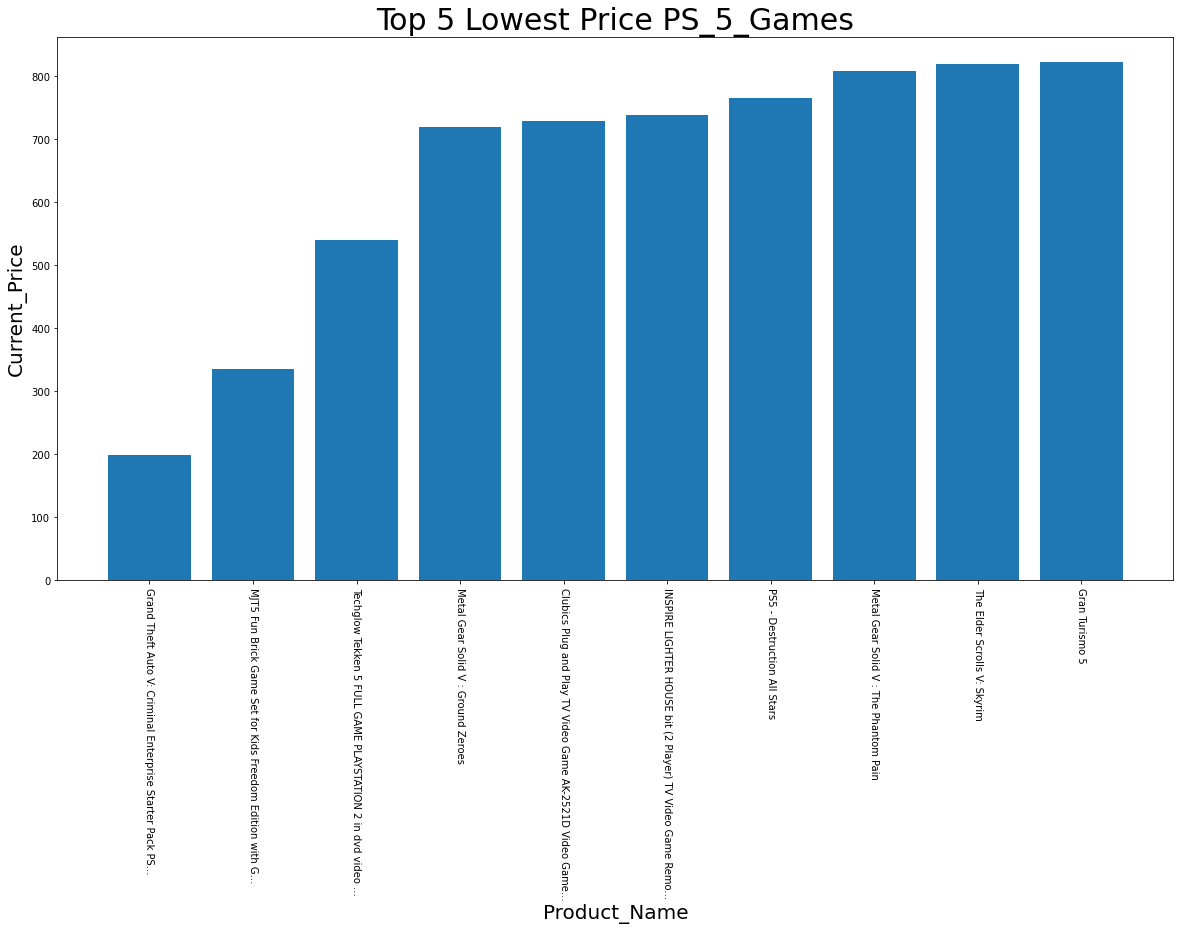

In [20]:
plt.figure(figsize=(20,10))
plt.bar(x=top5currentPrice['Product_Name'],height=top5currentPrice['Current_Price'])
plt.title('Top 5 Lowest Price PS_5_Games',fontsize=30)
plt.xlabel('Product_Name',fontsize=20)
plt.ylabel('Current_Price',fontsize=20)
plt.xticks(rotation=270)
plt.show()

In [21]:
midrange = df[(df['Current_Price']<1000) & (df['Current_Price']>100)]
midrange.sort_values(by='Ratings').head()

,Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl
123,Metal Gear Solid V: The Phantom Pain PS4 (2015),0.0,969,51% off,1999,0,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
125,GTA FIVE GTA 5 PS4 GAME GRAND THEFT AUTO (NO C...,0.0,899,70% off,2999,0,Free delivery,https://rukminim1.flixcart.com/image/612/612/l...
142,Resident Evil 5 PS3 (2009),0.0,928,38% off,1499,0,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
170,Gran Turismo 5: Academy Edition PS3 (2012),0.0,886,31% off,1299,0,Free delivery,https://rukminim1.flixcart.com/image/612/612/k...
130,Techglow Tekken 5 FULL GAME PLAYSTATION 2 in d...,2.3,540,55% off,1200,3,Bank Offer,https://rukminim1.flixcart.com/image/612/612/k...


In [22]:
smalldf = df[['Product_Name','Current_Price','MRP']]
smalldf

,Product_Name,Current_Price,MRP
0,Horizon Forbidden West,2899,4999
1,PS5 - Uncharted : Legacy Of Thieves collection,1599,2999
2,Marvel’s Spider-Man: Miles Morales (Ultimate E...,4495,4999
3,Gran Turismo 7 (Standard),2918,4999
4,Call Of Duty : Modern Warfare II,5955,6999
...,...,...,...
193,PlayStation Store Gift Card: 3500 INR (PSN Dig...,3500,0
194,PlayStation Store Gift Card: 4000 INR (PSN Dig...,4000,0
195,PlayStation Store Gift Card: 2500 INR (PSN Dig...,2500,0
196,PlayStation Store Gift Card: 4500 INR (PSN Dig...,4500,0
